# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**
Para abordar el problema y poder armar un modelo de Machine Learning necesitamos disponer de un set de datos con la siguiente información: precios de referencias de propiedades con sus respectivas caracteristicas, por ej zona, localidad, metros cubiertos, metros totales del terreno, cantidad de ambientes, cantidad de habitaciones, cantidad de baños el estado en que se encuentra y ubicación. Con esta información nos permitirá visualizar la variación de precios en función a dichas características

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
# Establecemos conexión con el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Clase para dar formato al texto
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
# Importar librería para graficar en mapa
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
# Carga de Data Frame para trabajar con los datos
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv') 

Se muestra a continuación cantiad de filas y columnas

In [ ]:
df.shape

(146660, 19)

Visualizamos las primeros 5 instancias

In [ ]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


##Significado de cámpos
Para entender mejor los campos nos dirigimos a la página properaty y copiamos la información debajo. 

Datos provistos por <a href='https://www.properati.com.ar'>Properati</a>

* type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
* country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
* id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
* start_date - Fecha de alta del aviso.
* end_date - Fecha de baja del aviso.
* created_on - Fecha de alta de la primera versión del aviso.
* place - Campos referidos a la ubicación de la propiedad o del desarrollo.
* lat - Latitud.
* lon - Longitud.
* l1 - Nivel administrativo 1: país.
* l2 - Nivel administrativo 2: usualmente provincia.
* l3 - Nivel administrativo 3: usualmente ciudad.
* l4 - Nivel administrativo 4: usualmente barrio.
* property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).
* operation - Tipo de operación (Venta, Alquiler).
* type - Tipo de propiedad (Casa, Departamento, PH).
* rooms - Cantidad de ambientes (útil en Argentina).
* bedrooms - Cantidad de dormitorios (útil en el resto de los países).
* bathrooms - Cantidad de baños.
* surface_total - Superficie total en m².
* surface_covered - Superficie cubierta en m².
* price - Precio publicado en el anuncio.
* currency - Moneda del precio publicado.
* price_period - Periodo del precio (Diario, Semanal, Mensual)
* title - Título del anuncio.
* description - Descripción del anuncio.
* development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
* status - Estado del desarrollo (Terminado, En construcción, ...)
* name - Nombre del desarrollo.
* short_description - Descripción corta del anuncio.
* description - Descripción del anuncio.

Verificamos con qué moneda estamos trabajando, de que países y tipo de operaciones en el dataset

In [ ]:
df.groupby(['currency']).size().reset_index(name='Cantidad').style.hide_index()


currency,Cantidad
USD,146660


Totas las instancias tienen moneda USD

In [ ]:
df.groupby(['l1']).size().reset_index(name='Cantidad').style.hide_index()


l1,Cantidad
Argentina,146660


Todas las instancias corresponden a Argentina

In [ ]:
df.groupby(['operation_type']).size().reset_index(name='Cantidad').style.hide_index()

operation_type,Cantidad
Venta,146660


Todas son operaciones de Venta

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
print(color.BOLD + color.UNDERLINE +'Nombres de Columnas\n\n'+ color.END + color.DARKCYAN, df.columns, sep="")
 
print(color.END + color.BOLD + color.UNDERLINE +'\nCantidad de nulos por columnas\n\n'+ color.END + color.DARKCYAN, df.isnull (). sum (), sep="")



Nombres de Columnas

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

Cantidad de nulos por columnas

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


Tipo de datos en dataframe de análisis

In [ ]:
df.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

Con la información obtenida podemos identificar variables categoricas y variables numéricas

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
tipos_de_propiedades= df.property_type.unique()
print(color.DARKCYAN + 'Hay ',tipos_de_propiedades.size,'tipos de propiedades\n')
print(color.DARKCYAN +'', tipos_de_propiedades,'')


Hay  10 tipos de propiedades

 ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito'] 


In [ ]:
print(color.DARKCYAN + 'Cantidad de instancias por tipo')
df.groupby(['property_type']).size().reset_index(name='Cantidad').sort_values(by="Cantidad", ascending=False).style.background_gradient(cmap='Blues').hide_index()

Cantidad de instancias por tipo


property_type,Cantidad
Departamento,107326
Casa,21521
PH,14298
Lote,1312
Oficina,658
Otro,374
Local comercial,325
Casa de campo,322
Depósito,265
Cochera,259


Podemos visualizar que se concentran en tres grupos pricipales, Departamento, Casa y PH

No handles with labels found to put in legend.


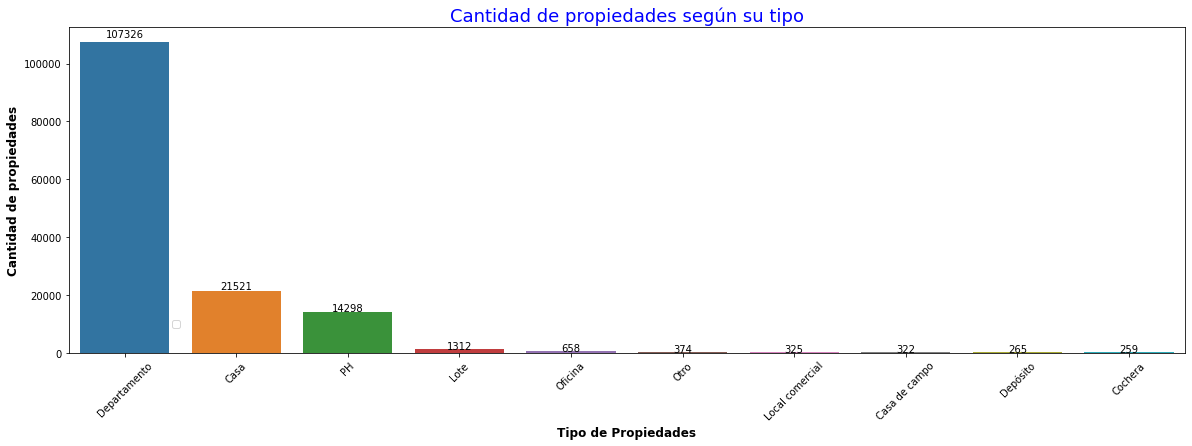

In [ ]:
# propiedades por tipo
plt.figure(figsize = (20,6))
ax = sns.countplot(data = df, x = "property_type", order = df['property_type'].value_counts().index)
for p in ax.patches: # para mostrar valor númerico sobre cada tipo correspodiente
       height = p.get_height()
       ax.text(p.get_x()+p.get_width()/2.,
               height + height*0.018,
               '{:1}'.format(height),
               ha="center") 

plt.legend(bbox_to_anchor=(0.1, 0.1), borderaxespad=0,  )
plt.title('Cantidad de propiedades según su tipo', fontsize=18, color='blue')
plt.xlabel('Tipo de Propiedades', rotation='0',fontweight = "black", fontsize = 12)
plt.ylabel('Cantidad de propiedades',fontweight = "black", fontsize = 12)
plt.xticks(rotation=45)
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
regiones= df.l2.unique()
print(color.DARKCYAN + 'Hay ',regiones.size,'regiones\n')
print(color.DARKCYAN +'', regiones,'')

Hay  4 regiones

 ['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste'] 


In [ ]:
print(color.DARKCYAN + '\nCantidad de instancias por Región\n\n')

df.groupby(['l2']).size().reset_index(name='Cantidad').sort_values(by="Cantidad", ascending=False,).style.background_gradient(cmap='Blues').hide_index()



Cantidad de instancias por Región




l2,Cantidad
Capital Federal,92539
Bs.As. G.B.A. Zona Norte,24282
Bs.As. G.B.A. Zona Sur,17173
Bs.As. G.B.A. Zona Oeste,12666


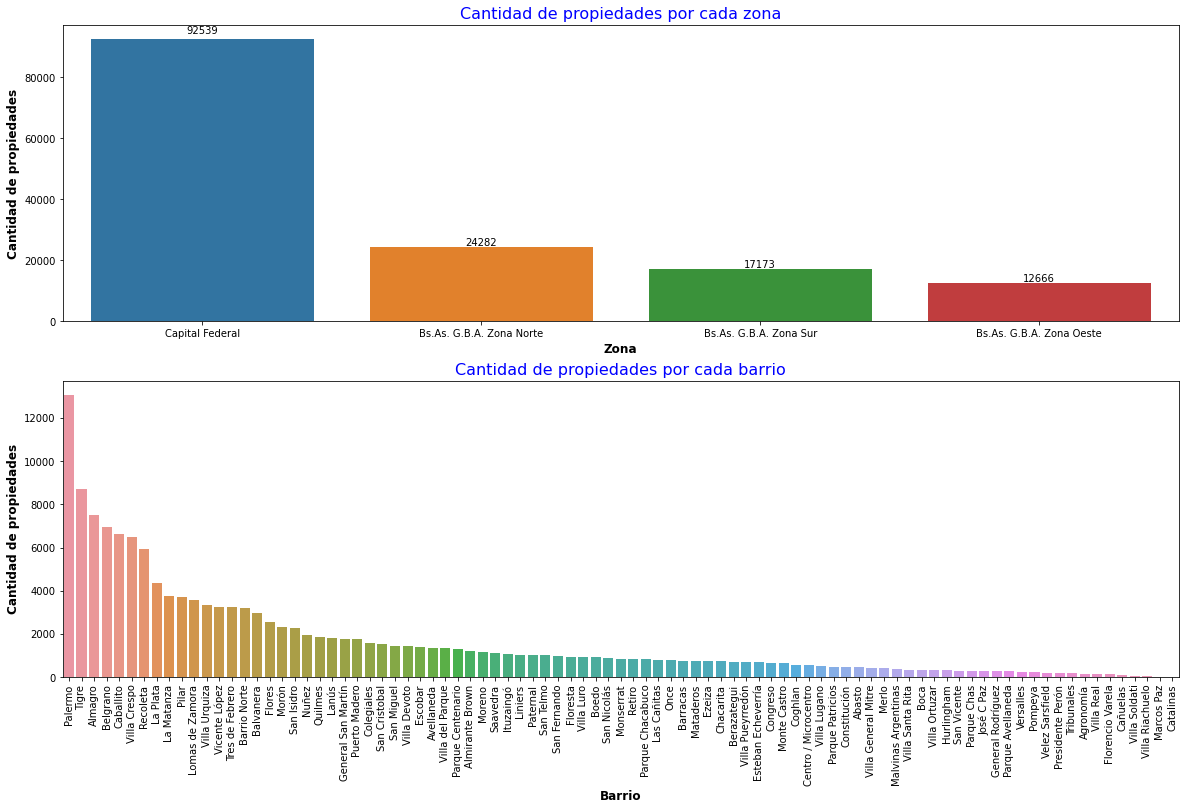

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(2,1,1)
ax=sns.countplot(x = "l2", data = df, order = df['l2'].value_counts().index)
for p in ax.patches: # para mostrar valor númerico sobre cada tipo correspodiente
       height = p.get_height()
       ax.text(p.get_x()+p.get_width()/2.,
               height + height*0.018,
               '{:1}'.format(height),
               ha="center") 
plt.xlabel("Zona", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada zona", fontsize=16, color="blue")

plt.subplot(2,1,2)
ax=sns.countplot(x = "l3", data = df, order = df['l3'].value_counts().index) 
plt.xticks(rotation = 90)
plt.xlabel("Barrio", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada barrio", fontsize=16, color="blue")
plt.show()

Podemos observar que los barrios con mayor cantidad de propiedades en venta son Palermo, Tigre y Almagro

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Creamos un nuevo dataframe con las tres clases más abundante de tipos de propiedades (Departamento, Casa y PH) y de la regíon que tiene más propiedades (Capital Federal)

In [ ]:
#selecciona las tres clases más abundantes de tipos de propiedad por medio de mascara
mask_property_type=df.property_type.isin(["Departamento","Casa","PH"])
df_property_type=df[mask_property_type]
#Filtramos solo la zona de capital Federal
df_select=df_property_type[df_property_type.l2=="Capital Federal"]
print(color.BOLD + 'Datos seleccionados\n\n'+ color.END + color.DARKCYAN + color.BOLD + 'Región:\n' + color.END + color.DARKCYAN,df_select["l2"].value_counts(), sep="")
print(color.DARKCYAN + color.BOLD +'\nTipo:\n'+ color.END + color.DARKCYAN,df_select["property_type"].value_counts(), sep="")
#Verificamos tamaño del dataframe
print(color.END+'\nTamaño del dataframe')
print(color.DARKCYAN +'Tamaño del dataframe',df_select.shape)



Datos seleccionados

Región:
Capital Federal    91485
Name: l2, dtype: int64

Tipo:
Departamento    79029
PH               9764
Casa             2692
Name: property_type, dtype: int64

Tamaño del dataframe
Tamaño del dataframe (91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
# 1 Valores estadisticos
df_select[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe().style.background_gradient(cmap='Blues')


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,91485.000000
mean,2.964278,1.960278,1.560147,112.626369,94.966310,259500.258239
std,1.314704,1.072946,0.860309,980.713664,778.515243,322265.440799
min,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000,120000.000000
50%,3.000000,2.000000,1.000000,71.000000,63.000000,175000.000000
75%,4.000000,3.000000,2.000000,111.000000,96.000000,279000.000000
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,32434232.000000


* Los valores de mínimo y máximo no aportan información relevantes para armar el modelo dado que son muy extremos.
* La desviación estandar tan grande evidencia la gran disperción de los datos

In [ ]:
# Observación de valores nulos en los campos seleccionados
print(color.BOLD + color.UNDERLINE +'Cantidad de nulos por columnas\n\n'+ color.END + color.DARKCYAN, df_select.isnull (). sum (), sep="")


Cantidad de nulos por columnas

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64


* dado que se observan valores nulos en variables relevantes para armar el modelo,  se procede a eliminar las instanacias con nulos en las columnas bathrooms, surface_total y en surface_covered

In [ ]:
# Eliminamos instancias que no tienen datos en sus columnas "bathrooms","surface_total","surface_covered"
df_select=df_select.dropna(subset=["bathrooms","surface_total","surface_covered"])

# Verificación
#print(color.BOLD + color.UNDERLINE +'Verificación\n\n'+ color.END + color.DARKCYAN, df_select.isnull (). sum (), sep="")
print(color.DARKCYAN +'Tamaño del dataframe',df_select.shape)

Tamaño del dataframe (81210, 19)


In [ ]:
# Filtrar las instancias que tienen superficie cubierta mayor a superficie total
df_select=df_select[df_select.surface_total>=df_select.surface_covered]
print(color.DARKCYAN +'Tamaño del dataframe',df_select.shape)

Tamaño del dataframe (80458, 19)


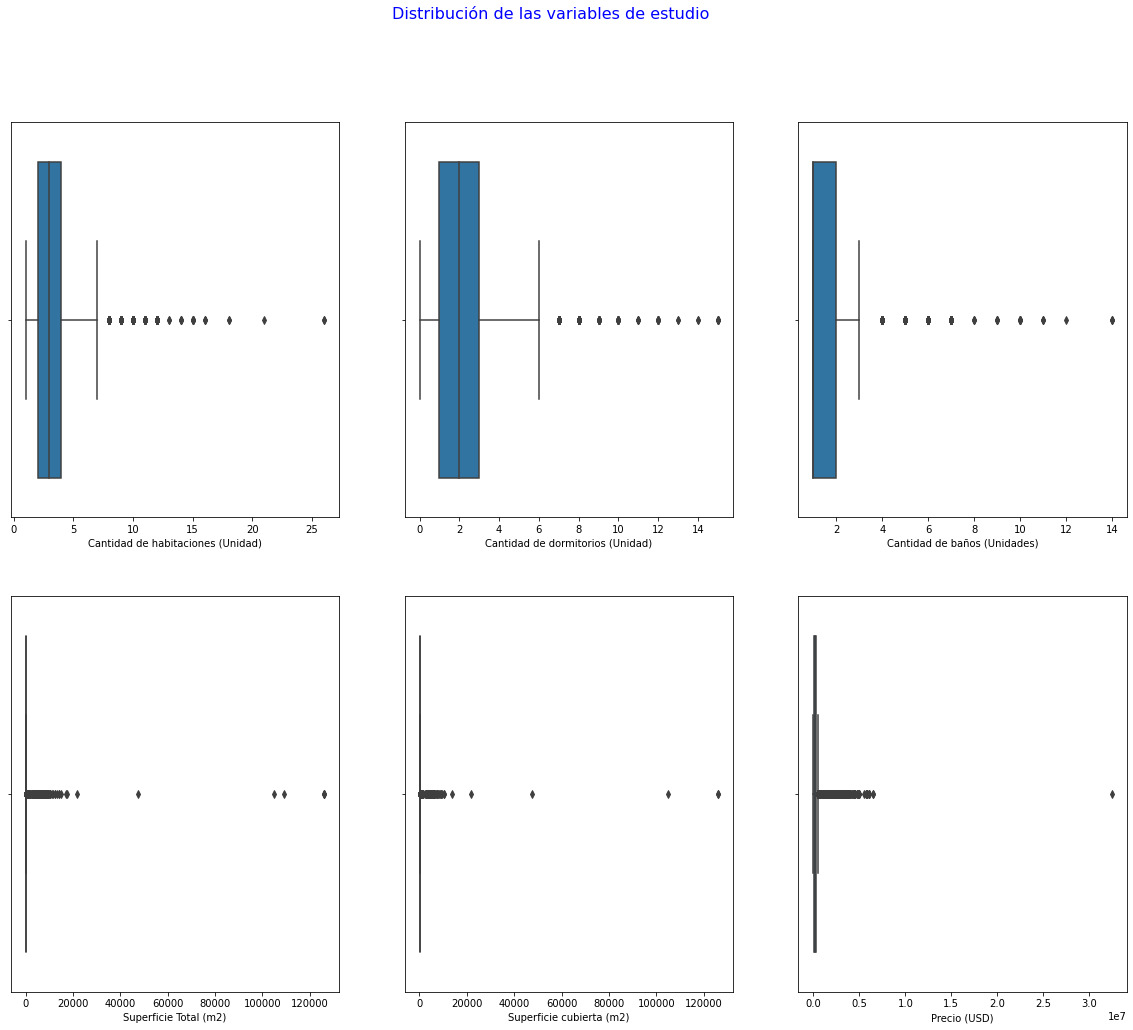

In [ ]:
# Distribución y relación de a pares de rooms, bedrooms, bathrooms, surface_total, surface_covered, price
plt.figure(figsize = (20,16))
plt.suptitle('Distribución de las variables de estudio', fontsize=16, color='blue')

vars_to_plot = ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']
vars_label = ['Cantidad de habitaciones (Unidad)','Cantidad de dormitorios (Unidad)','Cantidad de baños (Unidades)','Superficie Total (m2)','Superficie cubierta (m2)','Precio (USD)']

for i, var in enumerate(vars_to_plot):
  plt.subplot(2,3,i +1)
  sns.boxplot(x = var, data = df_select)
  plt.xlabel(vars_label[i])

* Se observa gran disperción en las variables de precio, superficie total y superficie cubierta. Vamos a visualizar los valores utilizando los intervalos intercuartílico. Para no filtrar demasiado los datos se usó primer y noveno decil

In [ ]:

Q1 = df.quantile(0.1)
Q10 = df.quantile(0.9)
IQR = Q10 - Q1

df_select_clean = df_select[~((df_select < (Q1 - 1.5 * IQR)) |(df_select > (Q10 + 1.5 * IQR))).any(axis=1)]

In [ ]:
print(color.DARKCYAN +'Tamaño del dataframe',df_select_clean.shape)

Tamaño del dataframe (77498, 19)


In [ ]:
df_select_clean.describe().style.background_gradient(cmap='Blues')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73649.000000,73649.000000,77498.000000,77498.000000,77498.000000,77498.000000,77498.000000,77498.000000
mean,-34.598492,-58.435651,2.919495,1.936837,1.482387,87.692882,75.296885,222033.163024
std,0.023343,0.035260,1.162937,0.955166,0.734198,60.954635,46.402442,150056.737259
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,13.000000,1.000000,6000.000000
25%,-34.612333,-58.458076,2.000000,1.000000,1.000000,49.000000,44.000000,123405.000000
50%,-34.598915,-58.433334,3.000000,2.000000,1.000000,70.000000,61.000000,175000.000000
75%,-34.584785,-58.411382,4.000000,3.000000,2.000000,104.000000,90.000000,268000.000000
max,-34.535909,-58.353930,9.000000,6.000000,6.000000,637.000000,394.000000,952210.000000


  

*   Se observa que estamos dejando fuera propiedades con superficie cubierta mayore a 394
*   Se visualiza instancia con superficie cubierta igual a 1 por lo que se podríamos descartar ese registro


 

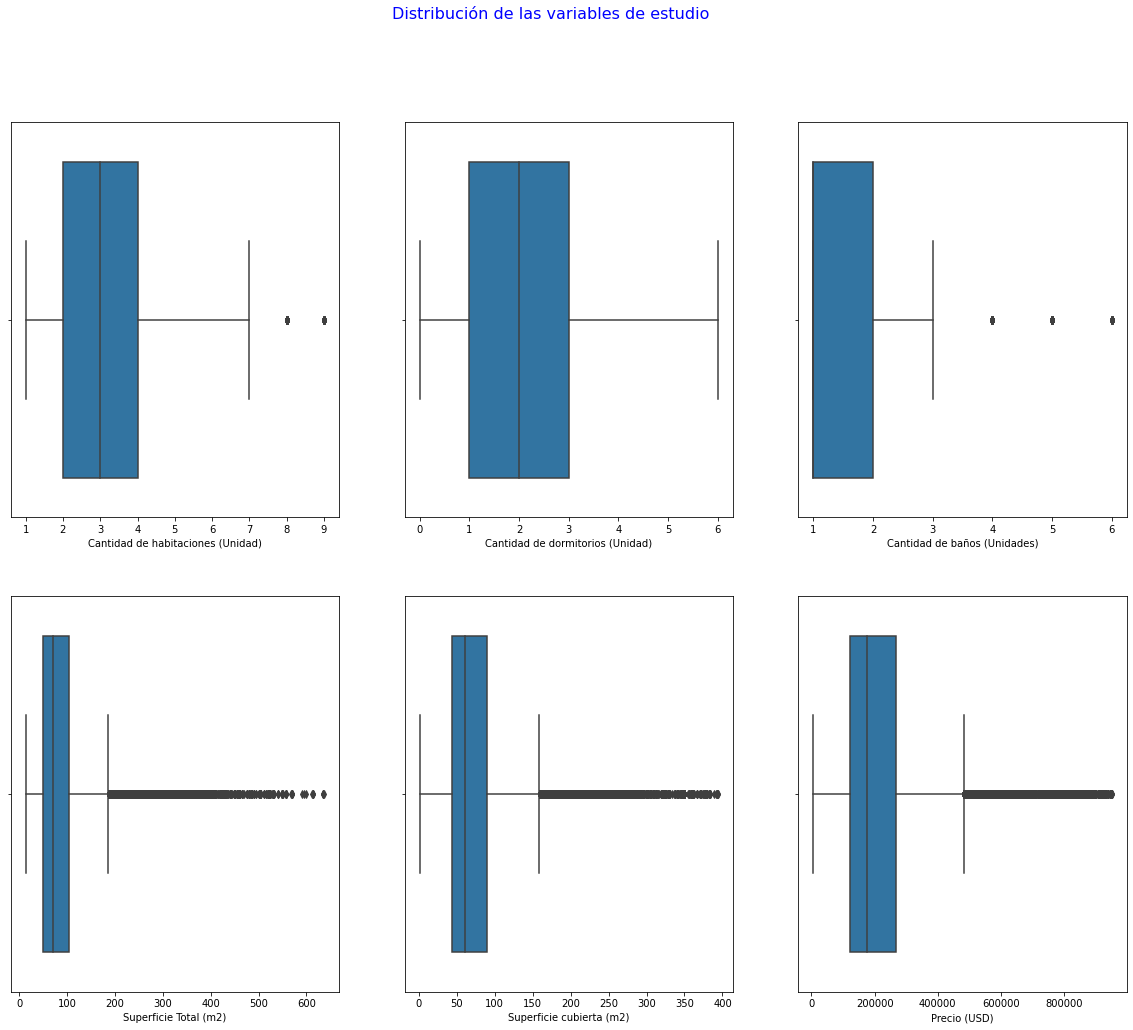

In [ ]:
# Distribución y relación de a pares de rooms, bedrooms, bathrooms, surface_total, surface_covered, price
plt.figure(figsize = (20,16))
plt.suptitle('Distribución de las variables de estudio', fontsize=16, color='blue')

vars_to_plot = ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']
vars_label = ['Cantidad de habitaciones (Unidad)','Cantidad de dormitorios (Unidad)','Cantidad de baños (Unidades)','Superficie Total (m2)','Superficie cubierta (m2)','Precio (USD)']

for i, var in enumerate(vars_to_plot):
  plt.subplot(2,3,i +1)
  sns.boxplot(x = var, data = df_select_clean)
  plt.xlabel(vars_label[i])


Para entender mejor como se comporta el precio en función a de las variables rooms, bedrooms y bathrooms graficamos boxplot para ver sus datos estadisticos de forma visual

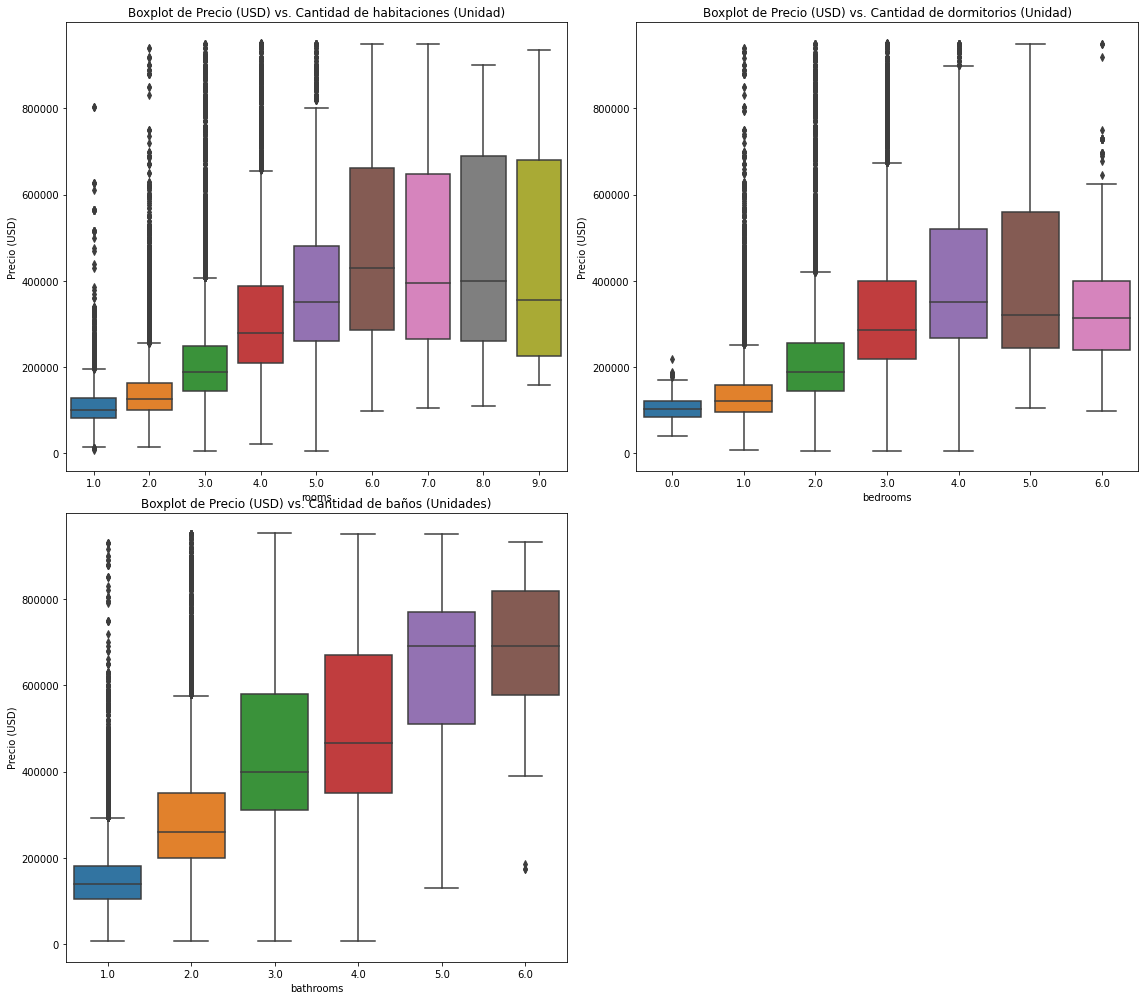

In [ ]:
plt.figure(figsize=(16,14))
vars_to_plot = ['rooms', 'bedrooms', 'bathrooms']
vars_label = ['Cantidad de habitaciones (Unidad)','Cantidad de dormitorios (Unidad)','Cantidad de baños (Unidades)']

for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='price', data = df_select_clean)
    title_string = "Boxplot de Precio (USD) vs. " + vars_label[i]
    plt.ylabel("Precio (USD)")
    plt.tight_layout()
    plt.title(title_string)

Para analizar precio basado en como estan conformadas las propiedades (cantidad de ambientes, dormitorio y baño) se propone crear una variable dimensión la cual consta de la suma ponderada de sus características, columna ambientes multiplicado por 1000, dormitorios multiplicado por cién y por último baño. De esta forma podremos tener todas las combinaciones posibles


In [ ]:
#Creamos columna concatenando cantidad de habitaciones, dormitorios y baños
df_select_clean['dimension'] = df_select_clean['rooms']*1000 + df_select_clean['bedrooms']*100 + df_select_clean['bathrooms']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Ejemplo
df_select_clean.dimension[33]

2101.0

* Para interpretar el código dimensión veamos el ej. de arriba: código 2101 significa 2 ambientes, 1 dormitorio y 1 baño

In [ ]:
print(color.BOLD + 'Visualización de cantidades de propiedades por dimensión\n', color.END, sep='')
df_select_clean.groupby(['dimension']).size().reset_index(name='Cantidad').sort_values(by="Cantidad", ascending=False,).style.background_gradient(cmap='Blues').hide_index()


Visualización de cantidades de propiedades por dimensión



dimension,Cantidad
2101.000000,21811
3201.000000,15474
3202.000000,8059
4302.000000,6824
1101.000000,5908
4301.000000,4253
4303.000000,2872
2102.000000,2208
5402.000000,1355
3203.000000,928


Observamos la cantidad de propiedades con sus respectivas dimensiones y debajo vemos la distribución de precio en función de las demas variables numéricas

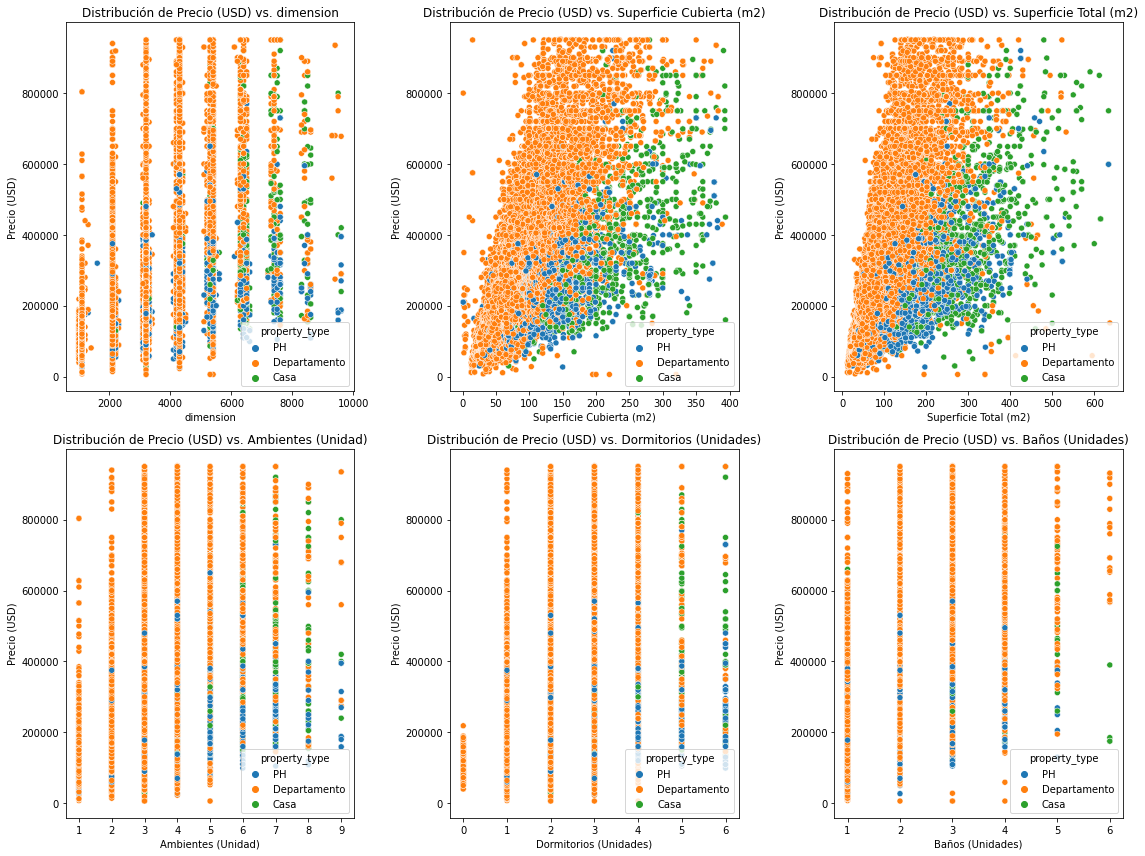

In [ ]:
plt.figure(figsize = (16,12))

vars_to_plot = ['dimension', 'surface_covered', 'surface_total','rooms','bedrooms','bathrooms']
vars_label = ['dimension', 'Superficie Cubierta (m2)', 'Superficie Total (m2)','Ambientes (Unidad)','Dormitorios (Unidades)','Baños (Unidades)']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x = var, y='price', data = df_select_clean, hue='property_type')
    title_string = "Distribución de Precio (USD) vs. " + vars_label[i]
    plt.ylabel("Precio (USD)")
    plt.xlabel(vars_label[i], rotation='0')
    plt.tight_layout()
    plt.title(title_string)


* Visualizando el gráfico de arriba podemos decir que existen una gran cantidad de departamento con muchas opciones

Frecuencia de de superficie total, superficie cubierta y precio por tipo de propiedad


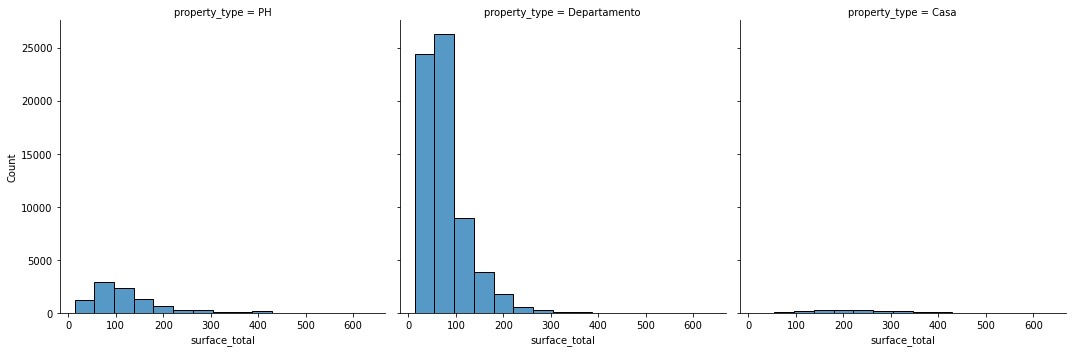

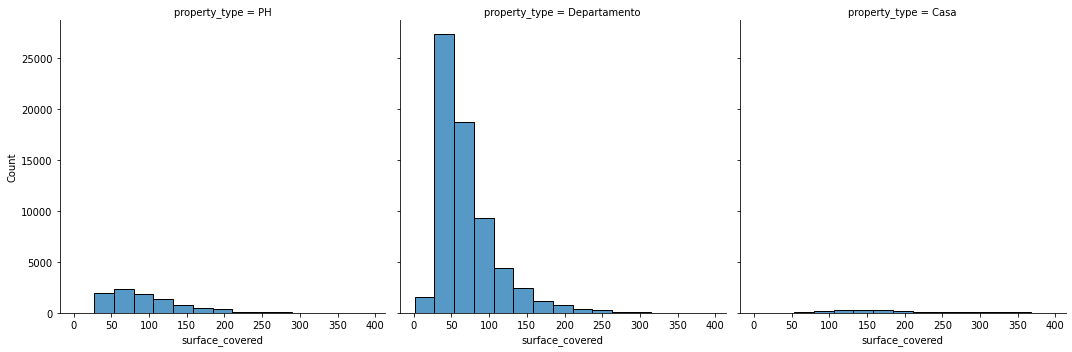

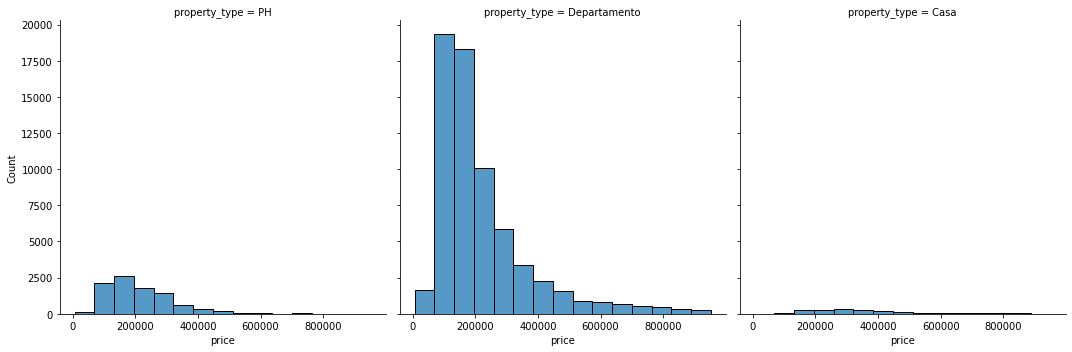

In [ ]:
print(color.BOLD + 'Frecuencia de de superficie total, superficie cubierta y precio por tipo de propiedad')
sns.displot(data=df_select_clean, x="surface_total",col="property_type", common_norm=False, bins = 15)
sns.displot(data=df_select_clean, x="surface_covered", col="property_type", common_norm=False, bins = 15)
sns.displot(data=df_select_clean, x="price", col="property_type", common_norm=False, bins = 15, )


In [ ]:
sns.pairplot(df_select_clean, hue="property_type")

Output hidden; open in https://colab.research.google.com to view.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

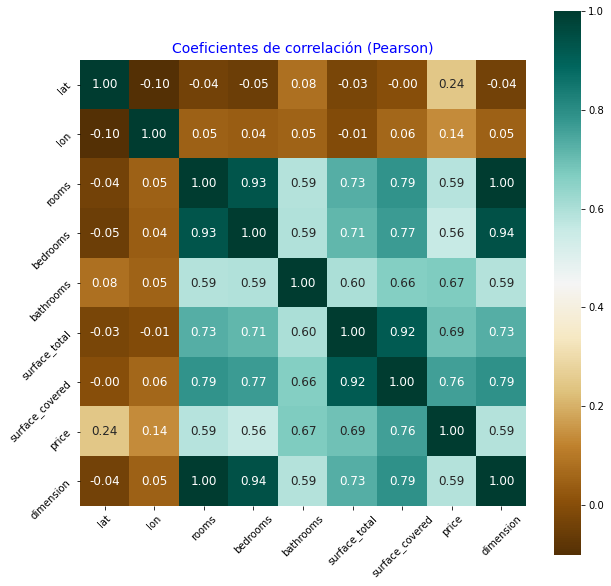

In [ ]:
# Encontrar las relaciones entre las variables. 
plt.figure (figsize = (10,10)) 

c = df_select_clean.corr () 
sns.heatmap (c, cbar = True, square = True, fmt= '.2f',annot_kws={'size': 12},cmap = "BrBG", annot = True) 
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 14, color = "blue")


In [ ]:
c_price = df_select_clean.corr ()["price"]
df_c_price = pd.DataFrame(c_price.sort_values(ascending=False))
df_c_price.style.background_gradient(cmap='BrBG', )

,price
price,1.000000
surface_covered,0.760124
surface_total,0.693530
bathrooms,0.670381
dimension,0.587380
rooms,0.586502
bedrooms,0.559797
lat,0.243907
lon,0.139869


* Las variables que mejor correlación tienen con el precio son Superficie cubierta, superficie total, baños y se posiciona en quinto lugar la variable creada dimensión


Veamos el mismo análisis por tipo de propiedad

In [ ]:
for i, var in enumerate(["Departamento","PH","Casa"]):
  c_price = df_select_clean[df_select_clean.property_type==var].corr ()["price"]
  df_c_price[i] = pd.DataFrame(c_price.sort_values(ascending=False))
df_c_price = df_c_price.rename(columns={0: 'Departamento', 1: 'PH', 2: 'Casa'})
df_c_price.iloc[:,1:4].style.background_gradient(cmap='BrBG')

,Departamento,PH,Casa
price,1.000000,1.000000,1.000000
surface_covered,0.821971,0.736619,0.665049
surface_total,0.798927,0.676591,0.623360
bathrooms,0.687016,0.532950,0.493879
dimension,0.609115,0.555565,0.455652
rooms,0.607932,0.553066,0.455265
bedrooms,0.582292,0.546856,0.378663
lat,0.260752,0.269295,0.411115
lon,0.178020,0.130576,-0.038299


* Para el clase tipo "Casa" se observa un aumento de correlación entre precio y latitud


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### Determinar cantidad de Propiedades en venta en un radio de 1000 metros del Obelisco
* Pare ello debemos buscar en google map la cordenada del obelisco y obtener la distancia a cada propiedad, por último filtrar las propiedades con distancia menor o igual a 1000 metros

* Ademas se propone encontrar la propiedad de menor precio y observar la superficie cubierta


In [ ]:
# Creo una copia del dataframe
desafio= df_select_clean.copy()

In [ ]:
# Verifico instancia de ej.
desafio.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,dimension
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.41211,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2102.0


In [ ]:
# Selecciono las columnas con datos de latitud y longitud
desafio.iloc[:,3:5]

,lat,lon
1,-34.624056,-58.412110
2,-34.593569,-58.427474
3,-34.581294,-58.436754
5,-34.593779,-58.441239
6,-34.600988,-58.433061
...,...,...
146553,-34.581308,-58.431236
146554,-34.585355,-58.427194
146555,-34.585355,-58.427194
146556,-34.584134,-58.436389


In [ ]:
# Creo array con mismas dimensiones que el dataframe desafio para luego ingresar latitud y longitud del obelisco
origen=np.ones((77498,2))

####**Obtengo coordenadas del obelisco desde Google Map**

Latitud: -34.603739044208844, Longitud-58.38156926871103

Podriamos modificar los datos de latitud y longitud con algun punto de interes y observar oferta de propiedades en ventas. Ej disponibilidad cercana a Universidades, Hospitales, oficina de trabajo, etc...


In [ ]:
# cargo valores de latitud y longitud en dos variables
latitud=-34.603739044208844
longitud=-58.38156926871103

# Asigno valores a array origen
origen[:,0]=latitud
origen[:,1]=longitud

In [ ]:
# Verifico dimensión
origen.shape

(77498, 2)

In [ ]:
# Creo dataframe
df_origen=pd.DataFrame(origen)

In [ ]:
# Verificar 
#df_origen.dtypes.index

In [ ]:
df_origen

,0,1
0,-34.603739,-58.381569
1,-34.603739,-58.381569
2,-34.603739,-58.381569
3,-34.603739,-58.381569
4,-34.603739,-58.381569
...,...,...
77493,-34.603739,-58.381569
77494,-34.603739,-58.381569
77495,-34.603739,-58.381569
77496,-34.603739,-58.381569


In [ ]:
# Cambio el nombre de las columnas
df_origen = df_origen.rename(columns={0: 'lat', 1: 'lon'})

In [ ]:
df_origen

,lat,lon
0,-34.603739,-58.381569
1,-34.603739,-58.381569
2,-34.603739,-58.381569
3,-34.603739,-58.381569
4,-34.603739,-58.381569
...,...,...
77493,-34.603739,-58.381569
77494,-34.603739,-58.381569
77495,-34.603739,-58.381569
77496,-34.603739,-58.381569


In [ ]:
# Asigno coordenadas (x1,y1) (x2,y2)
x1 = df_origen.lat.values
x2 = desafio.iloc[:,3:5].lat.values

y1 = df_origen.lon.values
y2 = desafio.iloc[:,3:5].lon.values


In [ ]:
# Uso función para calcular distancia en Km
# Referencia: https://stackoverrun.com/es/q/4271930

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [ ]:
# Creo columna con distancia en Km al punto de interés
desafio['distancia']= haversine_np(y1, x1, y2, x2)

In [ ]:
# Verifico
desafio.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,dimension,distancia
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.41211,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2102.0,3.591487


### Filtramos las propiedades cuya distancia lineal es menor o igual a 1 Km del Obelisco

In [ ]:
# Filtro las instancias con distancia menor o igual a 1 Km
desafio_cercado=desafio[desafio.distancia <= 1]

In [ ]:
# Observamos los datos de estadistica descriptiva
desafio_cercado.describe().style.background_gradient(cmap='Blues')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,dimension,distancia
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,-34.602130,-58.382425,2.917859,1.907245,1.435625,78.553761,73.986156,180483.238579,3110.018920,0.655056
std,0.004512,0.005040,1.466363,1.043902,0.750737,55.581130,50.307602,125244.935977,1562.534309,0.269684
min,-34.612606,-58.392457,1.000000,0.000000,1.000000,17.000000,14.000000,40000.000000,1001.000000,0.000105
25%,-34.605378,-58.386503,2.000000,1.000000,1.000000,40.000000,38.000000,98000.000000,2101.000000,0.474633
50%,-34.602418,-58.381850,3.000000,2.000000,1.000000,61.000000,59.000000,139000.000000,3201.000000,0.708515
75%,-34.598078,-58.378456,4.000000,3.000000,2.000000,104.000000,97.000000,220000.000000,4301.000000,0.889760
max,-34.594887,-58.371087,9.000000,6.000000,5.000000,456.000000,359.000000,850000.000000,9402.000000,0.999927


In [ ]:
# Vemos la cantidad de instancias
desafio_cercado.shape

(2167, 21)

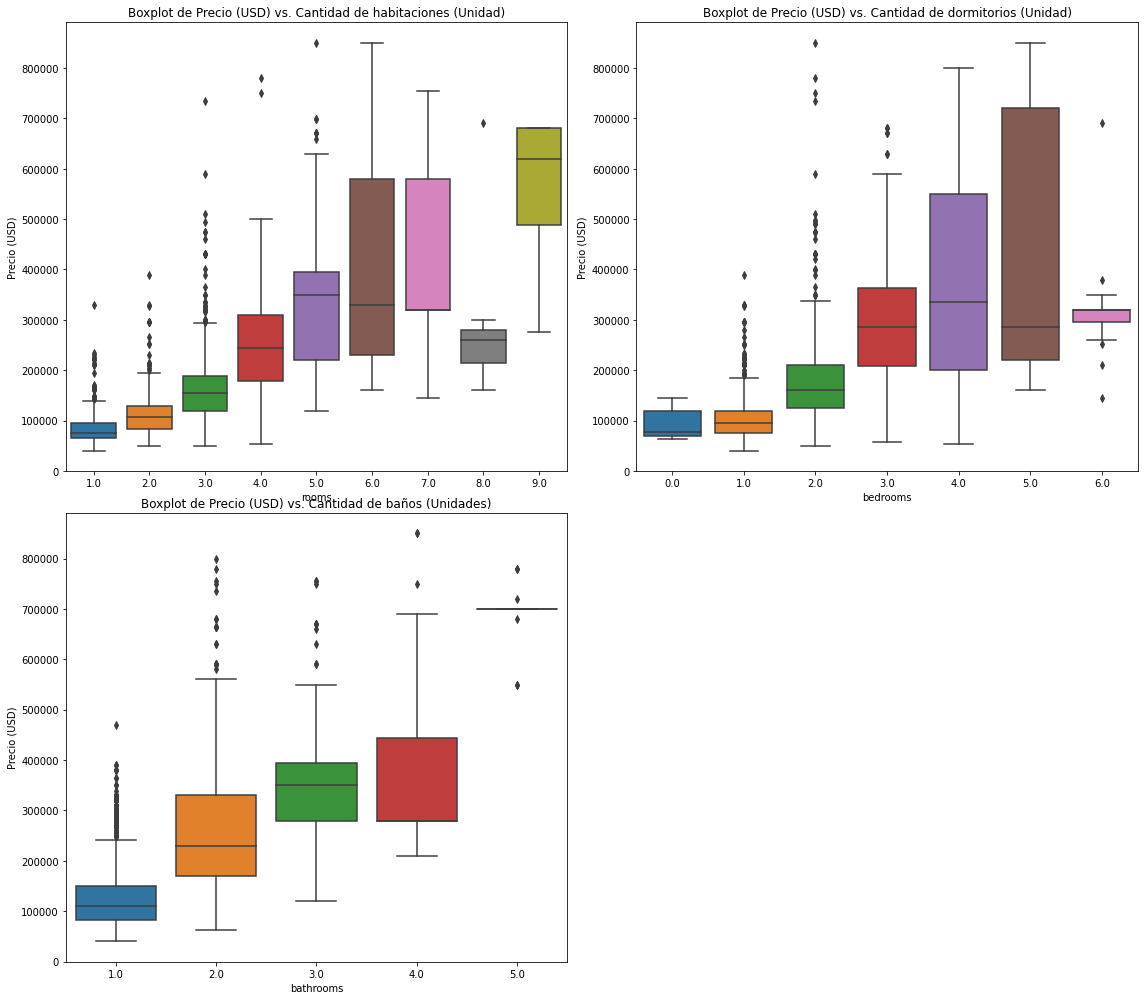

In [ ]:
# Visualizamos con boxplot sus estadisticos
plt.figure(figsize=(16,14))
vars_to_plot = ['rooms', 'bedrooms', 'bathrooms']
vars_label = ['Cantidad de habitaciones (Unidad)','Cantidad de dormitorios (Unidad)','Cantidad de baños (Unidades)']

for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='price', data = desafio_cercado)
    title_string = "Boxplot de Precio (USD) vs. " + vars_label[i]
    plt.ylabel("Precio (USD)")
    plt.tight_layout()
    plt.title(title_string)

### Procedemos a graficar en un mapa las propiedades en venta cercanas al Obelisco

In [ ]:
mapa = folium.Map(location=[-34.603739044208844,-58.38156926871103], tiles='cartodbpositron', zoom_start=14, width='80%',height='50%')

In [ ]:
mc1 = MarkerCluster()
for idx, row in desafio_cercado.iterrows():
  if not math.isnan(row['lon']) and not math.isnan(row['lat']):
    mc1.add_child(Marker([row['lat'], row['lon']]))
mapa.add_child(mc1)
mapa

### Propiedad cercana al obelizo de menos precio

In [ ]:
prop_min=desafio_cercado[desafio_cercado.price==desafio_cercado.price.min()]
print(color.BOLD,'PROPIEDAD DE MENOR PRECIO:\n\n', color.END + color.DARKCYAN, prop_min.iloc[0]['title'],' \nsu precio es: USD ', prop_min.iloc[0]['price'], sep='')
print('Superficie cubierta m2:', prop_min.iloc[0]['surface_covered'], sep='')
print('Distancia lineal al obelisco en metros:', prop_min.iloc[0]['distancia'] * 1000, sep='')


PROPIEDAD DE MENOR PRECIO:

Torre Lavalle 750 6 piso 1 Amb super Luminoso. baño Completo. Vigilancia 24 hrs  
su precio es: USD 40000.0
Superficie cubierta m2:25.0
Distancia lineal al obelisco en metros:371.4767440464719


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### Filtramos y seleccionamos instancias indicadas

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
# Filtro por Cápital Federa y tipo de propiedades ("Departamento","Casa","PH")
df_ML=df[df.l2=="Capital Federal"]
df_ML=df_ML[df_ML.property_type.isin(["Casa","PH","Departamento"])]
df_ML.shape

(91485, 19)

In [ ]:
# Filtramos por superficie total mayor a 15 y menor a 1000
df_ML=df_ML[(df_ML.surface_total >= 15) & (df_ML.surface_total <= 1000)]
df_ML.shape

(82405, 19)

In [ ]:
# Filtramos instancias con precio meno e igual a 4000000
df_ML=df_ML[df_ML.price<=4000000]

In [ ]:
df_ML_1=df_ML[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]

In [ ]:
# Eliminamos las instancias con Valores nulo
df_ML_1=df_ML_1.dropna()
print(color.DARKCYAN + 'Punto de control: ',df_ML.shape)

Punto de control:  (82373, 19)


### Benchmark

Se eligen las variables independiente superficie cubierta y superficie total dado que son las variables que más correlación tienen con el precio.

Se plantea como modelo base vecinos más cercanos con 5 vecinos


In [ ]:
# Importamos librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Seleccionamos las variables preditora "X" y la variable a predecir "y"
X_benchmark= df_ML_1[["surface_covered","surface_total"]]
y_benchmark= df_ML_1["price"]

In [ ]:
# Realizamos un Train/Test split de los datos
X_train, X_test, y_train, y_test =train_test_split(X_benchmark, y_benchmark, test_size=0.30, random_state=42)

In [ ]:
# Defino el modelo con 
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
#Entreno el modelo
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# Genero las predicciones con datos de entrenamiento y de test
y_train_pred=knn_regressor.predict(X_train)
y_test_pred=knn_regressor.predict(X_test)

In [ ]:
# Evaluo el error cuadrático medio RMSE
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(color.BOLD + color.DARKCYAN + color.UNDERLINE +'Modelo Benchmarck con KN vecinos\n' + color.END)
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Train:{rmse_train} con un r2 de: {r2_train}' )
print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Test:{rmse_test}con un r2 de: {r2_test}')


Modelo Benchmarck con KN vecinos

Raiz del Error cuadrático Medio en Train:143873.16675006645 con un r2 de: 0.7661282117742279
Raiz del Error cuadrático Medio en Test:170536.25990372853con un r2 de: 0.6817442856221098


In [ ]:
# Lista de resumen
resumen = [ ("Modelo Benchmarck KN vecinos","Cantidad de vecinos 5", "2", rmse_test )]
#Creo objeto DataFrame
df_resumen = pd.DataFrame(resumen, columns = ['Modelo' , 'Hiper-parametro', 'variables','RMSE (test)'])
#Add new ROW
df_resumen


,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


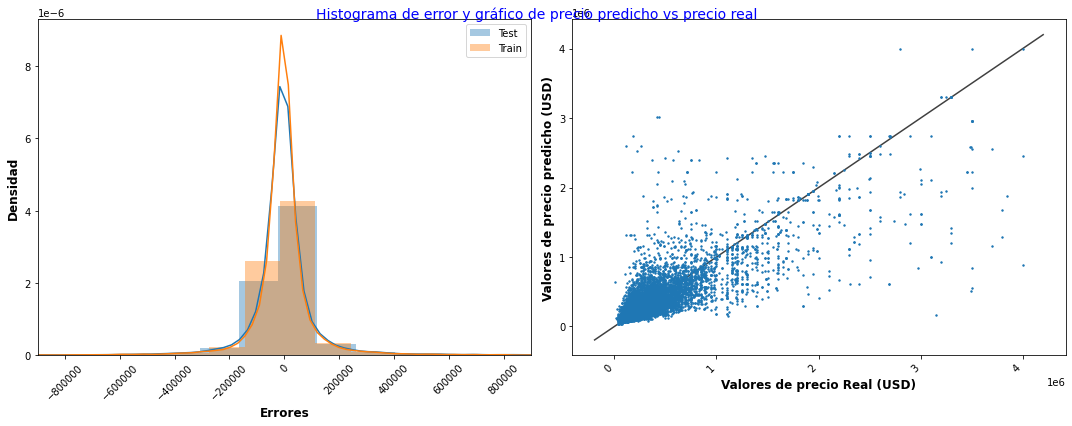

In [ ]:
plt.figure(figsize=(15,6))
plt.suptitle('Histograma de error y gráfico de precio predicho vs precio real', color="blue", fontsize="14")

plt.subplot(1,2,1)
sns.distplot(y_test - y_test_pred, bins=40, label='Test')
sns.distplot(y_train - y_train_pred, bins=40, label='Train')
plt.xlabel("Errores", fontweight="black", fontsize="12")
plt.ylabel("Densidad", fontweight="black", fontsize="12")
plt.xticks(rotation=45)
plt.xlim(-900000,900000)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0) 
plt.xticks(rotation=45, horizontalalignment="right")
plt.xlabel("Valores de precio Real (USD)", fontweight="black", fontsize="12")
plt.ylabel("Valores de precio predicho (USD)", fontweight="black", fontsize="12")

plt.tight_layout()
plt.show()




### Modelo ML

Se crea una función para evaluar desenpeño según el modelo

In [ ]:
def modelo_ML(X, y, modelo):
  X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.30, random_state=42)
  modelo.fit(X_train, y_train)
  # Genero las predicciones con datos de entrenamiento y de test
  y_train_pred=modelo.predict(X_train)
  y_test_pred=modelo.predict(X_test)
  # Calculo el error cuadramo medio
  rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
  print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Train:{rmse_train}')
  print(color.BOLD + color.DARKCYAN + f'Raiz del Error cuadrático Medio en Test:{rmse_test}')
  
  y_test_pred=y_test_pred.reshape(-1,1)
  y_train_pred=y_train_pred.reshape(-1,1)
  

  plt.figure(figsize=(15,6))
  plt.suptitle('Titulo')
  plt.subplot(1,2,1)
  sns.distplot(y_test - y_test_pred, bins=30, label='Test')
  sns.distplot(y_train - y_train_pred, bins=30, label='Train')
  plt.xlabel("Errores", fontweight="black", fontsize="12")
  plt.ylabel("Densidad", fontweight="black", fontsize="12")
  plt.xticks(rotation=45)
  plt.xlim(-900000,900000)
  
  plt.legend()

  ax = plt.subplot(1,2,2)
  ax.scatter(y_test,y_test_pred, s =2)
    
  lims = [
  np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
  np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
  ]
    
  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0) 
  plt.xticks(rotation=45, horizontalalignment="right")
  plt.xlabel("Valores de precio Real (USD)", fontweight="black", fontsize="12")
  plt.ylabel("Valores de precio predicho (USD)", fontweight="black", fontsize="12")

  plt.tight_layout()
  plt.show()
  return rmse_test


###**Árbol de decisión**

In [ ]:
# Selecciono variables
X= df_ML_1[["rooms","bedrooms","bathrooms","surface_covered","surface_total"]]
y= df_ML_1[["price"]]

In [ ]:
# Instancio Modelo
tree_model=DecisionTreeRegressor(max_depth=8)


In [ ]:
# Verifico dimensiones
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 2) (56713,) (24306, 2) (24306,)


Raiz del Error cuadrático Medio en Train:139064.9573938412
Raiz del Error cuadrático Medio en Test:158990.96155170398


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


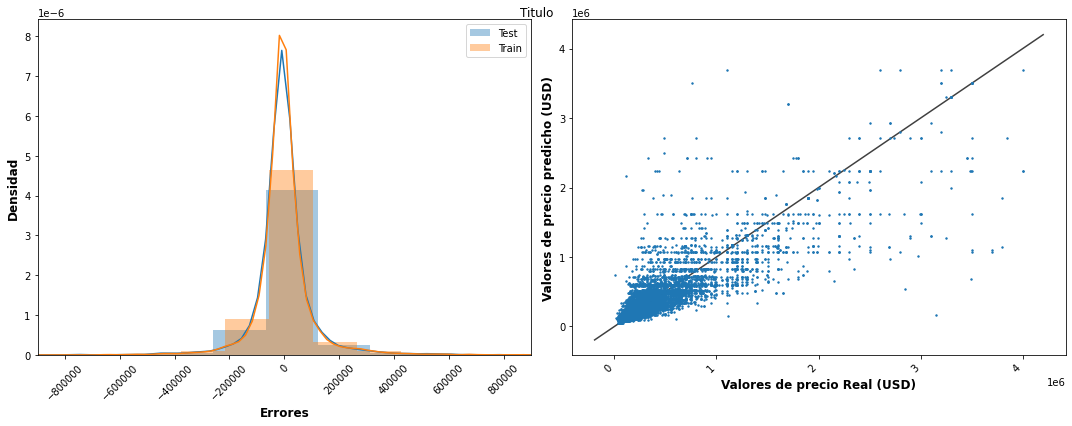

In [ ]:
# Llamo a la función
rmse_tree_model8= modelo_ML(X, y,tree_model)
 

Analizaremos cual es la produndidad optima a utilizar en el modelo

Text(0.5, 0.98, 'RMSE para diferentes valores de produndidad')

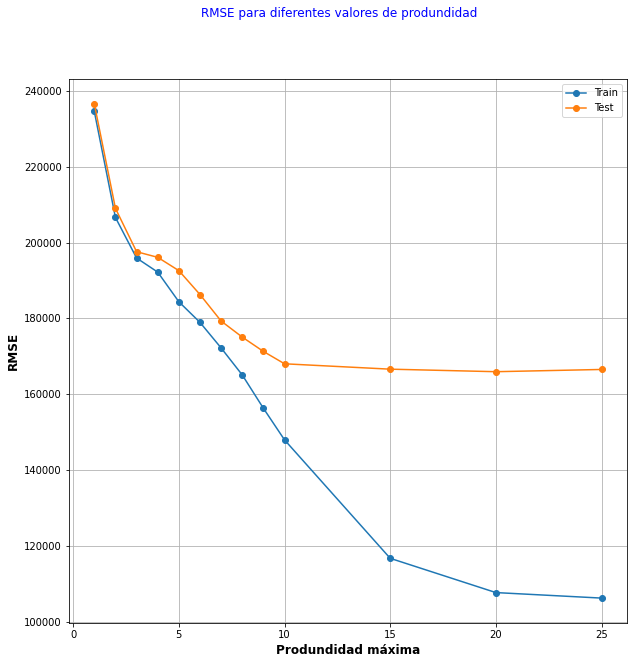

In [ ]:
lista_rmse_train=[]
lista_rmse_test=[]
lista_depths=[1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in lista_depths:
  model= DecisionTreeRegressor(max_depth=i)
  model.fit(X_train, y_train)
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)

  train_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred))

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize=(10,10))
plt.plot(lista_depths,lista_rmse_train, 'o-', label='Train')
plt.plot(lista_depths,lista_rmse_test, 'o-', label='Test')
plt.grid()
plt.legend()
plt.xlabel('Produndidad máxima', fontweight='black', fontsize=12)
plt.ylabel('RMSE', fontweight='black', fontsize=12)
plt.suptitle('RMSE para diferentes valores de produndidad', color='blue', fontweight=20)



Se eligío el valor de 10

In [ ]:
tree_model=DecisionTreeRegressor(max_depth=10)

Raiz del Error cuadrático Medio en Train:120797.5008434747
Raiz del Error cuadrático Medio en Test:153697.23356921488


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


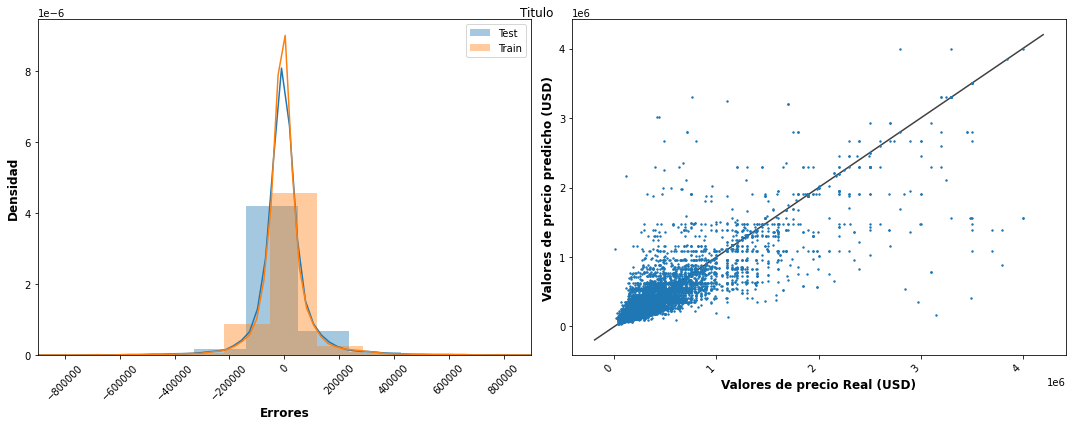

In [ ]:
rmse_tree_model10 = modelo_ML(X,y,tree_model)

Se observa la mejora

In [ ]:
# Agrego instancia a DataFrame de Resumen
df_resumen=df_resumen.append({'Modelo' : 'Arbol de desición' , 'Hiper-parametro' : 'Profundidad 10', 'variables' : '5','RMSE (test)' : rmse_tree_model10} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569


Se calcula la insidencia de cada variable en el modelo

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


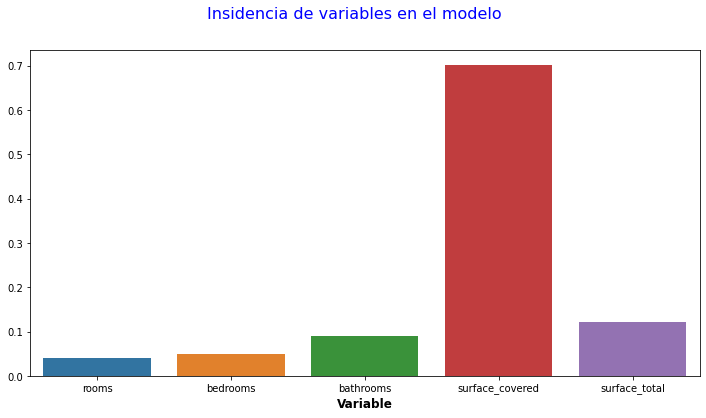

In [ ]:
importances=tree_model.feature_importances_
columns=X.columns

plt.figure(figsize=(12,6))
sns.barplot(columns,importances)
plt.xlabel('Variable', fontsize='12', fontweight='black')
plt.suptitle('Insidencia de variables en el modelo', fontsize='16', color='blue')
plt.show()

* Las variables que más incidencia tienen son Superficie cubierta, tuperficie total y cantidad de bañor

### **Vecinos más cercanos**

In [ ]:
# Instancio el modelo con hiper-parametro igual a cinco
KNN_model=KNeighborsRegressor(n_neighbors=5)

Raiz del Error cuadrático Medio en Train:121064.50152632296
Raiz del Error cuadrático Medio en Test:154991.0184846315


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


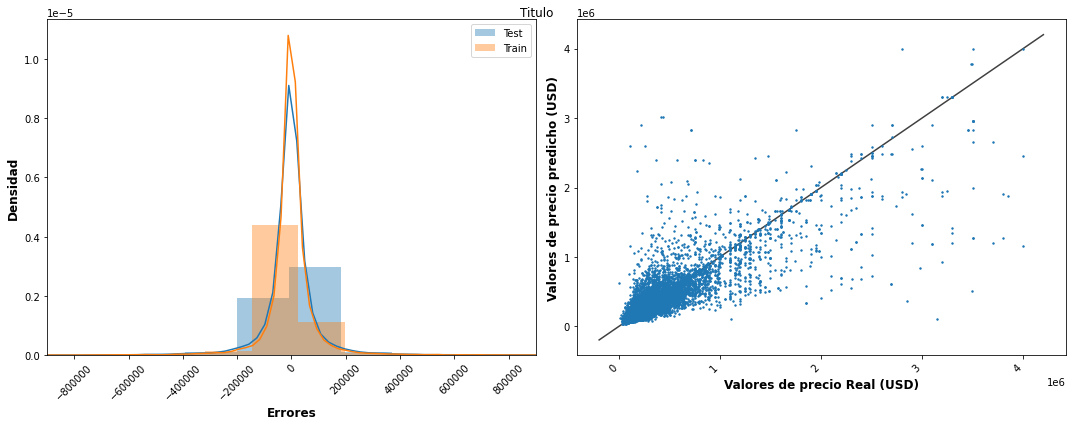

In [ ]:
# Invoco la función modelo_ML pasandole las variables, modelo a utilizar y guardo el resultado del RMSE en rmseKNN_model5
rmseKNN_model5 = modelo_ML(X,y,KNN_model)

* No se logra obtener mejora respecto al modelo anterior 

In [ ]:
# Agrego instancia a DataFrame de Resumen
df_resumen=df_resumen.append({'Modelo' : 'Vecinos más cercano' , 'Hiper-parametro' : 'Cantidad de vecinos 5', 'variables' : '5','RMSE (test)' : rmseKNN_model5} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485


Text(0.5, 0.98, 'RMSE para diferentes valores de k vecinos')

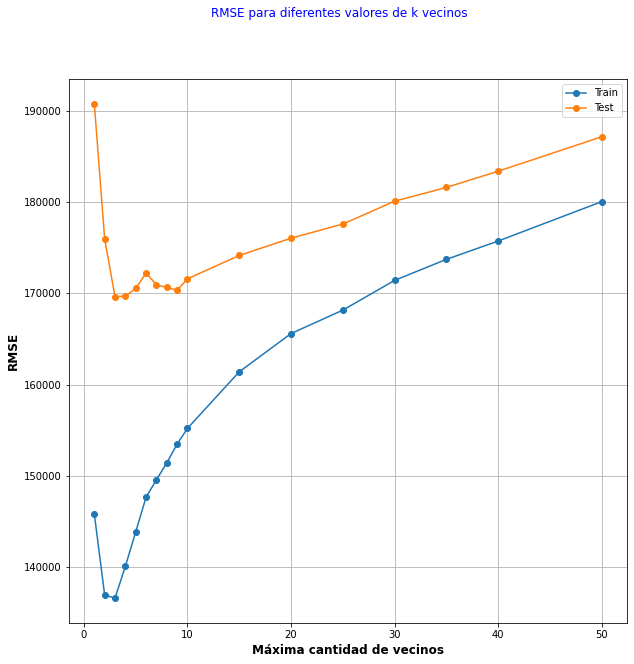

In [ ]:
lista_rmse_train=[]
lista_rmse_test=[]
lista_k_vecinos=[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for i in lista_k_vecinos:
  model= KNeighborsRegressor(n_neighbors=i)
  model.fit(X_train, y_train)
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)

  train_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred))

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize=(10,10))
plt.plot(lista_k_vecinos,lista_rmse_train, 'o-', label='Train')
plt.plot(lista_k_vecinos,lista_rmse_test, 'o-', label='Test')
plt.grid()
plt.legend()
plt.xlabel('Máxima cantidad de vecinos', fontweight='black', fontsize=12)
plt.ylabel('RMSE', fontweight='black', fontsize=12)
plt.suptitle('RMSE para diferentes valores de k vecinos', color='blue', fontweight=18)

Se elige el valor de hiper-parámetro 3 donde se visualiza menor RMSE

In [ ]:
KNN_model=KNeighborsRegressor(n_neighbors=3)

Raiz del Error cuadrático Medio en Train:102907.81905870317
Raiz del Error cuadrático Medio en Test:152030.30210184513


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


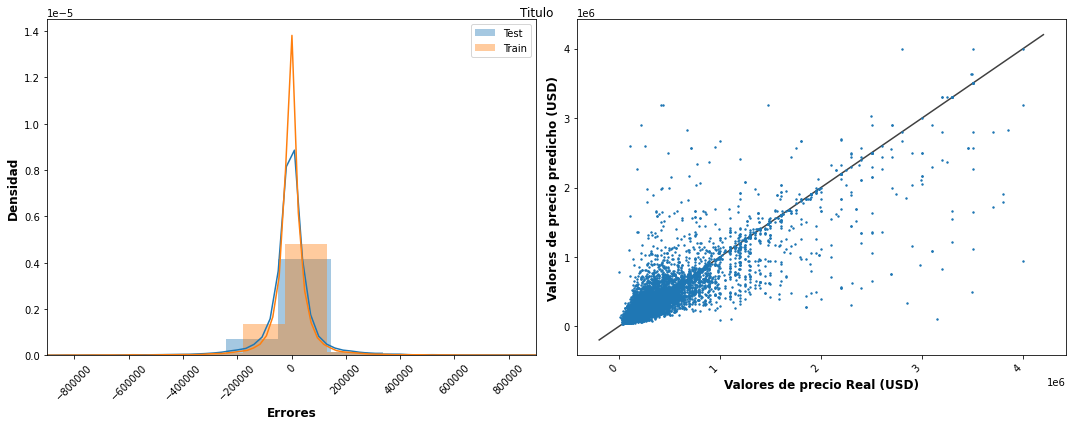

In [ ]:
rmse_KNN_model_3 = modelo_ML(X,y,KNN_model)

Se puede observar una leve mejora

In [ ]:
# Agrego instancia a DataFrame de Resumen
df_resumen=df_resumen.append({'Modelo' : 'Vecinos más cercano' , 'Hiper-parametro' : 'Cantidad de vecinos 3', 'variables' : '5','RMSE (test)' : rmse_KNN_model_3} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485
3,Vecinos más cercano,Cantidad de vecinos 3,5,152030.302102


### Agregamos variables de latitud y longitud al modelo
Ademas de agregar estas variables se propone crear una varible llamada dimensión con las combinaciones posibles de rooms, bedrooms y bathrooms

In [ ]:
# Seleccionamos las variables y creamos nuevo dataframe
df_ML_2=df_ML[["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
df_ML_3=df_ML[["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
# Creo variable dimesión concatenando los valores de rooms, bedrooms y bathrooms dandoles un peso diferente a cada variable obteniendo la combinación en una sola variable
df_ML_3["dimension"] = df_ML_3["rooms"]*1000 + df_ML_3["bedrooms"]*100 + df_ML_3["bathrooms"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Eliminamos las instancias con Valores nulo
df_ML_2=df_ML_2.dropna()
print(color.DARKCYAN + 'Punto de control: ',df_ML_2.shape)

Punto de control:  (76771, 8)


In [ ]:
# Eliminamos las instancias con Valores nulo
df_ML_3=df_ML_3.dropna()
print(color.DARKCYAN + 'Punto de control: ',df_ML_3.shape)

Punto de control:  (76771, 9)


In [ ]:
# Variables para el modelo lat, lon, rooms, bedrooms, bathrooms, surface_total y serface_covered
X_2=df_ML_2[["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered"]]
y_2=df_ML_2=df_ML_2[["price"]]

In [ ]:
KNN_model=KNeighborsRegressor(n_neighbors=3)

Raiz del Error cuadrático Medio en Train:94074.99324103778
Raiz del Error cuadrático Medio en Test:132671.26456873622


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


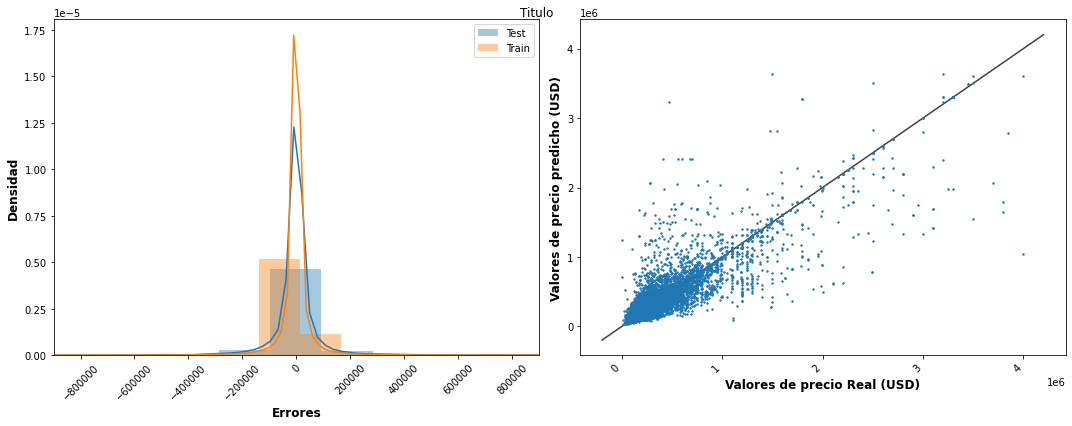

In [ ]:
rmse_KNN_model_3_X2 = modelo_ML(X_2,y_2,KNN_model)

* Se puede observar una mejora respecto de los modelos anteriores

In [ ]:
# Agrego instancia a DataFrame de Resumen
df_resumen=df_resumen.append({'Modelo' : 'Vecinos más cercano' , 'Hiper-parametro' : 'Cantidad de vecinos 3', 'variables' : '7','RMSE (test)' : rmse_KNN_model_3_X2} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485
3,Vecinos más cercano,Cantidad de vecinos 3,5,152030.302102
4,Vecinos más cercano,Cantidad de vecinos 3,7,132671.264569


Sustituyo las Variables rooms, bedrooms, bathrooms por la variable dimensión

In [ ]:
# Sustituyo las Variables rooms, bedrooms, bathrooms por la variable dimensión

X_3=df_ML_3[["lat","lon","dimension","surface_total","surface_covered"]]
y_3=df_ML_3=df_ML_3[["price"]]

Raiz del Error cuadrático Medio en Train:97781.99992754518
Raiz del Error cuadrático Medio en Test:143734.77064028734


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


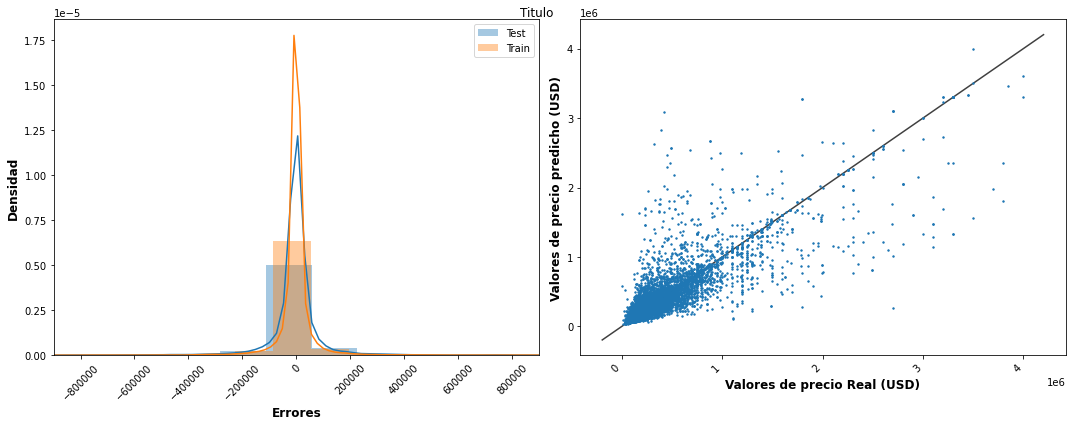

In [ ]:
rmse_KNN_model_3_X3 = modelo_ML(X_3,y_3,KNN_model)


* Al parecer el reemplazar las variables rooms, bedrooms y bathrooms por dimensión no mejora el modelo respecto a utilizar las tres variables antes mencionadas

In [ ]:
# Agrego instancia a DataFrame de Resumen
df_resumen=df_resumen.append({'Modelo' : 'Vecinos más cercano' , 'Hiper-parametro' : 'Cantidad de vecinos 3', 'variables' : '5','RMSE (test)' : rmse_KNN_model_3_X3} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485
3,Vecinos más cercano,Cantidad de vecinos 3,5,152030.302102
4,Vecinos más cercano,Cantidad de vecinos 3,7,132671.264569
5,Vecinos más cercano,Cantidad de vecinos 3,5,143734.770640


Veamos como se comporta en modelo de arbol de desición frente al uso de estas nuevas variables

In [ ]:
tree_model2 = DecisionTreeRegressor(max_depth = 10)

Raiz del Error cuadrático Medio en Train:80994.07241928209
Raiz del Error cuadrático Medio en Test:97574.3320085858


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


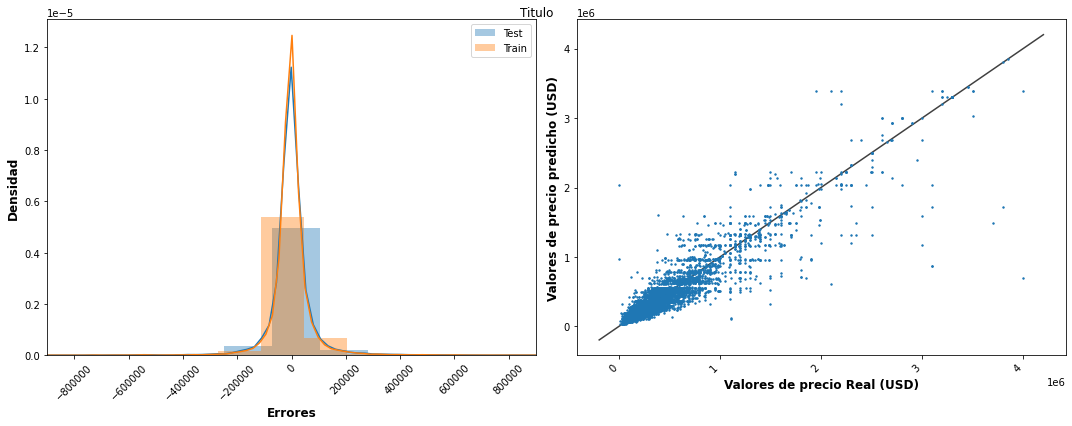

In [ ]:
rmse_tre_model2_10_X2 = modelo_ML(X_2,y_2,tree_model2)
importances2 = tree_model2.feature_importances_

* Aquí se puede visualizar una mejora considerable al incorporar latitud y logitud al modelo de árbol de desión

In [ ]:
# Agrego instancia a DataFrame de Resumen
df_resumen=df_resumen.append({'Modelo' : 'Árbol de desición' , 'Hiper-parametro' : 'Profundidad 10', 'variables' : '7','RMSE (test)' : rmse_tre_model2_10_X2} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485
3,Vecinos más cercano,Cantidad de vecinos 3,5,152030.302102
4,Vecinos más cercano,Cantidad de vecinos 3,7,132671.264569
5,Vecinos más cercano,Cantidad de vecinos 3,5,143734.770640
6,Árbol de desición,Profundidad 10,7,97574.332009


Veamos que ocurre al utilizar la variable dimensión

Raiz del Error cuadrático Medio en Train:79714.66223058148
Raiz del Error cuadrático Medio en Test:98961.05157779006


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


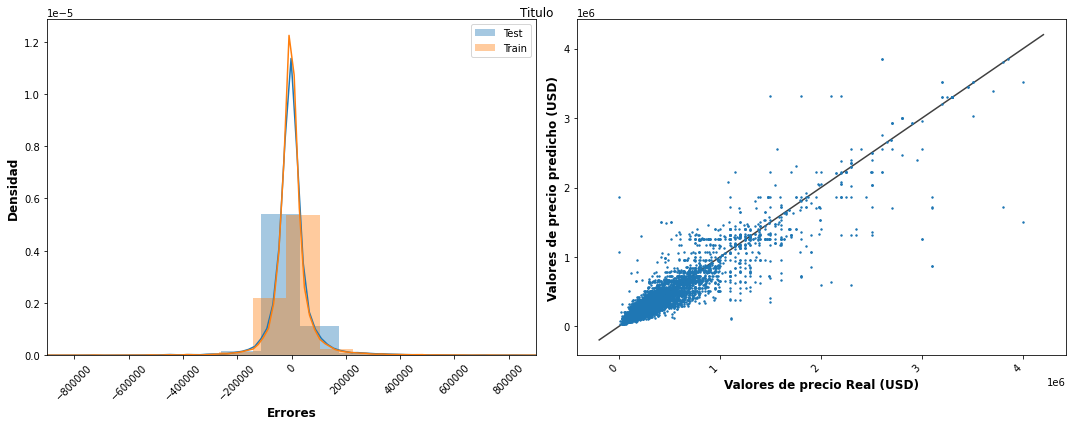

In [ ]:
rmse_tree_model2_10_X3 = modelo_ML(X_3,y_3,tree_model2)
importances3 = tree_model2.feature_importances_

Se hacer al valor de RMSE obtenido cuando utilizamos las variables rooms, bedrooms y bathrooms pero no lo mejora

In [ ]:
df_resumen=df_resumen.append({'Modelo' : 'Árbol de desición' , 'Hiper-parametro' : 'Profundidad 10', 'variables' : '5','RMSE (test)' : rmse_tree_model2_10_X3} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485
3,Vecinos más cercano,Cantidad de vecinos 3,5,152030.302102
4,Vecinos más cercano,Cantidad de vecinos 3,7,132671.264569
5,Vecinos más cercano,Cantidad de vecinos 3,5,143734.770640
6,Árbol de desición,Profundidad 10,7,97574.332009
7,Árbol de desición,Profundidad 10,5,98961.051578


Veamos la importancia de cada variable en el modelo

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


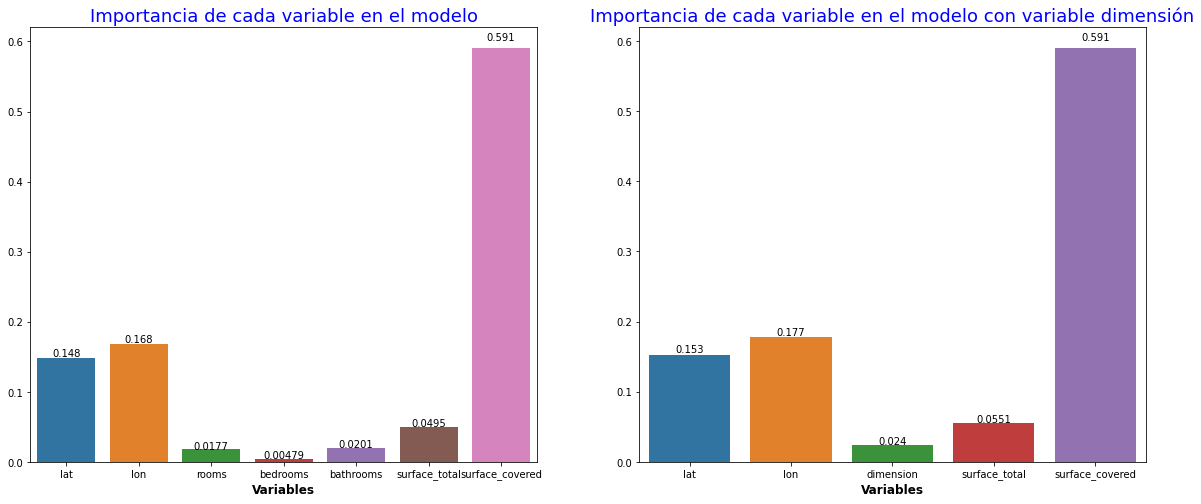

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
columns = X_2.columns
ax=sns.barplot(columns, importances2)
for p in ax.patches: # para mostrar valor númerico sobre cada tipo correspodiente
       height = p.get_height()
       ax.text(p.get_x()+p.get_width()/2.,
               height + height*0.018,
               '{:1.3}'.format(height),
               ha="center")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "b")

plt.subplot(1,2,2)
columns3 = X_3.columns
ax=sns.barplot(columns3, importances3)
for p in ax.patches: # para mostrar valor númerico sobre cada tipo correspodiente
       height = p.get_height()
       ax.text(p.get_x()+p.get_width()/2.,
               height + height*0.018,
               '{:1.3}'.format(height),
               ha="center")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo con variable dimensión", fontsize = 18, color = "b")
plt.show()

En un principio vimos que rooms y dimension tenian el mismo valor de correlación con el precio pero vemos que dimensión toma un valor levemente mayor en cuando a importancia. Por otra parte si bien latitud y longitud no tenian correlación con el precio, en el modelo se puede observer que  latitud y longitud tienen una impotancia mayor que la cantidad de ambientes, habitaciones y baños además dimensión obtiene mejor valor que bathrooms. Aun así si bien el RMSE para Train mejora en test queda ligeramente por encima con el modelo de Arbol de desición utilizando rooms, bedrooms y bathrooms que dimensión

### Chequeamos si varía el nivel de profundidad o de vecinos para ver si es necesario modificar el modelo
Se chequea si debemos variar los hiper-parametros para el caso de usar superficie total, superficie cubierta, dimensión, latitud y longitud

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad')

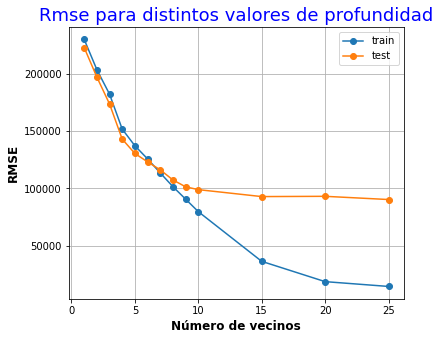

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]
X3_train, X3_test, y3_train, y3_test =train_test_split(X_3, y_3, test_size=0.30, random_state=42)
for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X3_train, y3_train)
    y3_train_pred = model.predict(X3_train)
    train_rmse = np.sqrt(mean_squared_error(y3_train, y3_train_pred))
    y3_test_pred = model.predict(X3_test)
    test_rmse = np.sqrt(mean_squared_error(y3_test, y3_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad", fontsize = 18, color = "b")

Se observa que se mantien

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

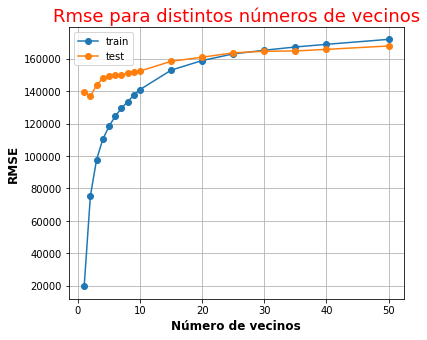

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X3_train, y3_train)
    y3_train_pred = model.predict(X3_train)
    train_rmse = np.sqrt(mean_squared_error(y3_train, y3_train_pred))
    y3_test_pred = model.predict(X3_test)
    test_rmse = np.sqrt(mean_squared_error(y3_test, y3_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Se observa que se obtiene mejor valor con 2

Raiz del Error cuadrático Medio en Train:75373.57490261015
Raiz del Error cuadrático Medio en Test:136833.5393036848


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


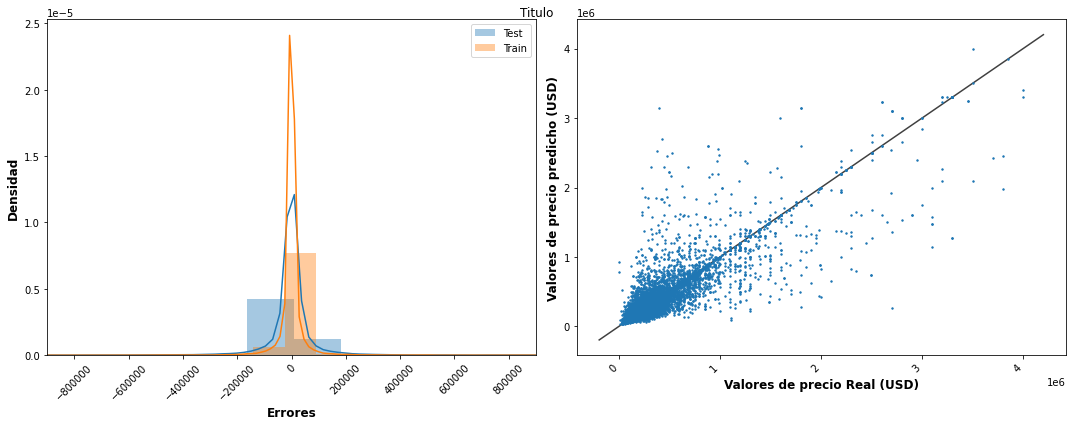

In [ ]:
KNN_model3=KNeighborsRegressor(n_neighbors=2)
rmse_KNN_model3_2_X3 = modelo_ML(X_3,y_3,KNN_model3)

Podemos ver que mejora los valores respecto de usar 3 vecinos

In [ ]:
df_resumen=df_resumen.append({'Modelo' : 'Vecinos más cercanos' , 'Hiper-parametro' : 'Cantidad de vecinos 2', 'variables' : '5','RMSE (test)' : rmse_KNN_model3_2_X3} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485
3,Vecinos más cercano,Cantidad de vecinos 3,5,152030.302102
4,Vecinos más cercano,Cantidad de vecinos 3,7,132671.264569
5,Vecinos más cercano,Cantidad de vecinos 3,5,143734.770640
6,Árbol de desición,Profundidad 10,7,97574.332009
7,Árbol de desición,Profundidad 10,5,98961.051578
8,Vecinos más cercanos,Cantidad de vecinos 2,5,136833.539304


### Probaremos modelo con las variables que más implicancia tienen

In [ ]:
df_ML_4=df_ML[["lat","lon","surface_total","surface_covered","price"]]

In [ ]:
# Eliminamos las instancias con Valores nulo
df_ML_4=df_ML_4.dropna()
print(color.DARKCYAN + 'Punto de control: ',df_ML_4.shape)

Punto de control:  (77601, 5)


In [ ]:
X_4=df_ML_4[["lat","lon","surface_total","surface_covered"]]
y_4=df_ML_4[["price"]]

Raiz del Error cuadrático Medio en Train:91984.38600123549
Raiz del Error cuadrático Medio en Test:139128.3636964709


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


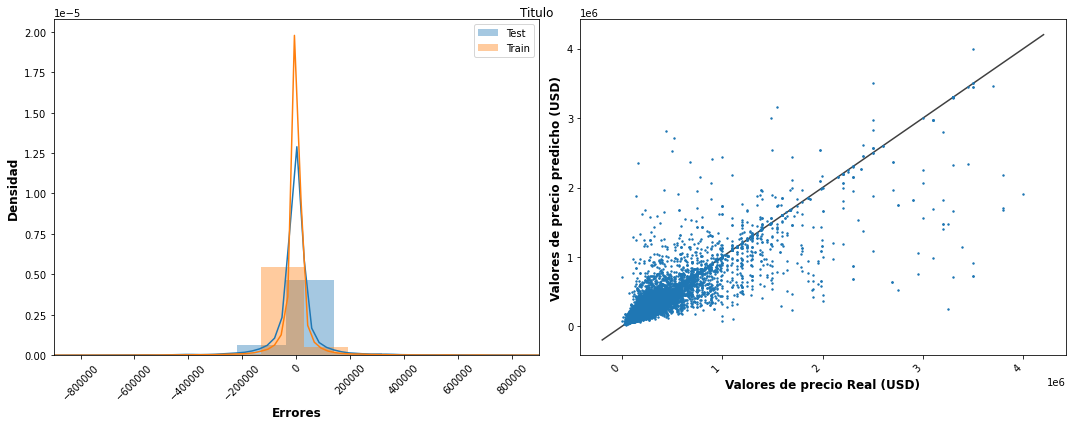

In [ ]:
KNN_model4=KNeighborsRegressor(n_neighbors=3)
rmse_KNN_model4_3 = modelo_ML(X_4,y_4,KNN_model4)

In [ ]:
df_resumen=df_resumen.append({'Modelo' : 'Vecinos más cercanos' , 'Hiper-parametro' : 'Cantidad de vecinos 3', 'variables' : '4','RMSE (test)' : rmse_KNN_model4_3} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485
3,Vecinos más cercano,Cantidad de vecinos 3,5,152030.302102
4,Vecinos más cercano,Cantidad de vecinos 3,7,132671.264569
5,Vecinos más cercano,Cantidad de vecinos 3,5,143734.770640
6,Árbol de desición,Profundidad 10,7,97574.332009
7,Árbol de desición,Profundidad 10,5,98961.051578
8,Vecinos más cercanos,Cantidad de vecinos 2,5,136833.539304
9,Vecinos más cercanos,Cantidad de vecinos 3,4,139128.363696


Raiz del Error cuadrático Medio en Train:87105.17601497928
Raiz del Error cuadrático Medio en Test:113694.70905175002


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


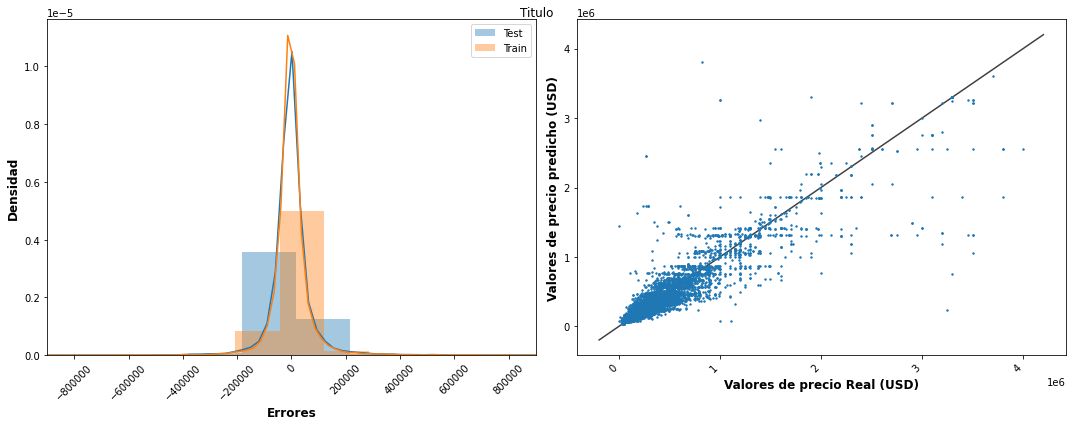

In [ ]:
tree_model4 = DecisionTreeRegressor(max_depth = 10)
rmse_tree_model4_10 = modelo_ML(X_4,y_4,tree_model4)

In [ ]:
df_resumen=df_resumen.append({'Modelo' : 'Árbol de desición' , 'Hiper-parametro' : 'Profundidad 10', 'variables' : '4','RMSE (test)' : rmse_tree_model4_10} , ignore_index=True)
# Visualizo
df_resumen.style.background_gradient(cmap='Spectral_r')

,Modelo,Hiper-parametro,variables,RMSE (test)
0,Modelo Benchmarck KN vecinos,Cantidad de vecinos 5,2,170536.259904
1,Arbol de desición,Profundidad 10,5,153697.233569
2,Vecinos más cercano,Cantidad de vecinos 5,5,154991.018485
3,Vecinos más cercano,Cantidad de vecinos 3,5,152030.302102
4,Vecinos más cercano,Cantidad de vecinos 3,7,132671.264569
5,Vecinos más cercano,Cantidad de vecinos 3,5,143734.770640
6,Árbol de desición,Profundidad 10,7,97574.332009
7,Árbol de desición,Profundidad 10,5,98961.051578
8,Vecinos más cercanos,Cantidad de vecinos 2,5,136833.539304
9,Vecinos más cercanos,Cantidad de vecinos 3,4,139128.363696


**Conclusión**

Podemos decir que el modelo que logra mejor desempeño es árbol de decisión, con una profundidad máxima igual a 10, ya sea que utilicemos 5 o 7 variables se obtiene valores similares. Tambien se observa que no mejora de forma significativa el agregado de la varible dimensión que combina las caracteristicas de las propiedades, además el RMSE obtenido sigue siendo alto lo que evidencia que aun debemos mejorar el modelo, tal vez segmentando por tipo de propiedad o barrio
